In [1]:
library(dplyr)
library(Seurat)
library(monocle3)
library("stringr")
library("factoextra")
library("Rtsne")
library(monocle3)

disease <- read.table("~/RNAsingle/mm10RIScounts.txt", header=TRUE, sep=",", row.names=1)
normal <- read.table("~/RNAsingle/mm10Growingcounts.txt", header=TRUE, sep=",", row.names=1)
Disease <- CreateSeuratObject(counts = disease , project = "disease")
Normal <- CreateSeuratObject(counts = normal , project = "normal")
pbmc1 <- merge(Disease, y=Normal, add.cell.ids = c("Disease", "Normal"), project = "Diseasevsnormal",merge.data = TRUE)
pbmcF <- CreateSeuratObject(counts=GetAssayData(pbmc1), project = "Diseasevsnormal", min.cells = 3, min.features = 200)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, 

In [2]:
GetAssayData(pbmcF)

   [[ suppressing 32 column names ‘Disease_AAACGGGCAACCGCCA.1’, ‘Disease_AAACGGGGTGCCTGCA.1’, ‘Disease_AAAGCAATCCTAGAAC.1’ ... ]]

   [[ suppressing 32 column names ‘Disease_AAACGGGCAACCGCCA.1’, ‘Disease_AAACGGGGTGCCTGCA.1’, ‘Disease_AAAGCAATCCTAGAAC.1’ ... ]]

   [[ suppressing 32 column names ‘Disease_AAACGGGCAACCGCCA.1’, ‘Disease_AAACGGGGTGCCTGCA.1’, ‘Disease_AAAGCAATCCTAGAAC.1’ ... ]]



16894 x 480 sparse Matrix of class "dgCMatrix"
                                                                                             
WASH7P             .  .   .   .   .  .   1   .  .  .   1   .   .   .  .   .   .   .  .   .  .
RP11-34P13.10      .  .   .   .   .  .   .   .  .  .   .   .   .   .  .   .   .   .  .   .  .
AP006222.2         .  .   .   .   .  .   .   .  .  .   .   .   .   .  .   .   .   .  .   .  .
RP4-669L17.10      .  .   .   .   .  .   .   .  .  .   .   .   .   .  .   .   .   1  .   .  .
MTND1P23           .  .   .   .   .  .   .   .  .  .   2   .   .   .  .   .   .   1  .   .  .
MTND2P28           .  .   .   1   .  .   .   .  .  .   .   .   1   .  .   .   .   1  .   .  .
hsa-mir-6723       2  .   2   1   1  .   2   1  2  1   2   1   3   1  3   2   4   .  2   .  1
RP5-857K21.7       2  1   2   .   1  .   .   2  .  1   1   .   1   1  .   .   2   1  .   .  .
MTATP6P1           .  .   1   .   .  .   1   .  .  .   1   1   .   .  .   .   .   .  .   .  .
RP5-857K21.11

In [3]:
data <- as(as.matrix(pbmcF@assays$RNA@data), 'sparseMatrix')
pd <- data.frame(pbmcF@meta.data)
pData <- pd %>% select(orig.ident, nCount_RNA, nFeature_RNA)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
monocle.object <- new_cell_data_set(expression_data = data, cell_metadata = pData, gene_metadata = fData)
head(pData)


,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
Disease_AAACGGGCAACCGCCA.1,Disease,55027,7463
Disease_AAACGGGGTGCCTGCA.1,Disease,27556,5400
Disease_AAAGCAATCCTAGAAC.1,Disease,44117,6924
Disease_AAAGCAATCGCCTGTT.1,Disease,32899,5588
Disease_AAAGTAGTCTCTTATG.1,Disease,29147,5147
Disease_AACCGCGAGCACGCCT.1,Disease,26240,5322


No preprocess_method specified, using preprocess_method = 'PCA'

No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



ERROR: Error in methods::is(cds, "cell_data_set"): object 'cds' not found


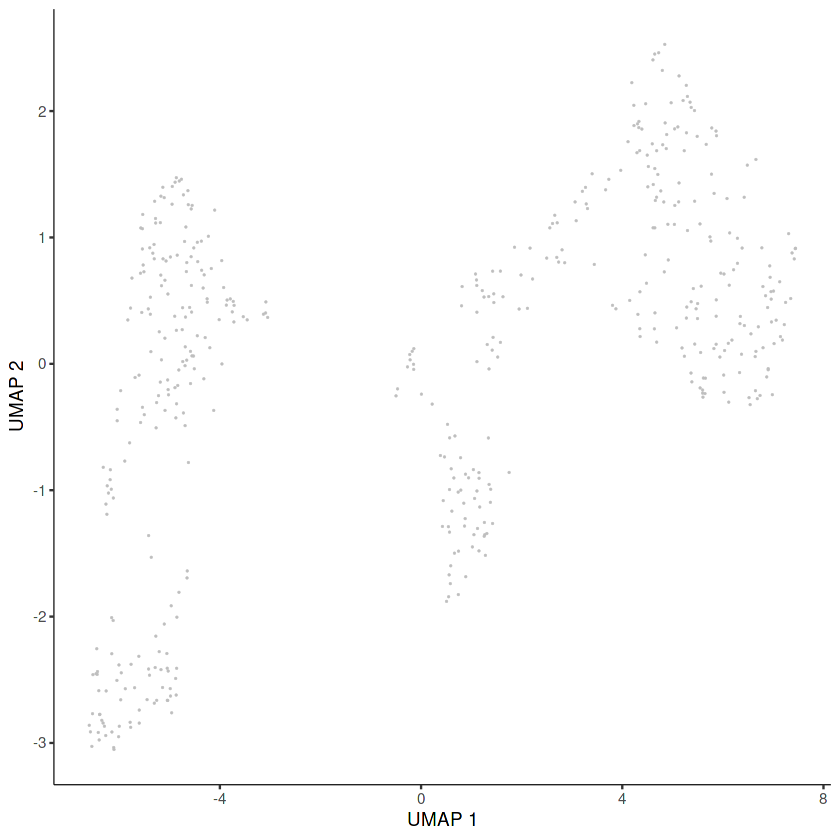

In [4]:
monocle.object = preprocess_cds(monocle.object, num_dim = 100, norm_method = "size_only", pseudo_count = 0)
monocle.object = reduce_dimension(monocle.object)
plot_cells(monocle.object)
monocle.object <- learn_graph(cds)
monocle.object <- cluster_cells(monocle.object)
plot_cells(monocle.object, color_cells_by = "partition")

No preprocess_method specified, using preprocess_method = 'PCA'

No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


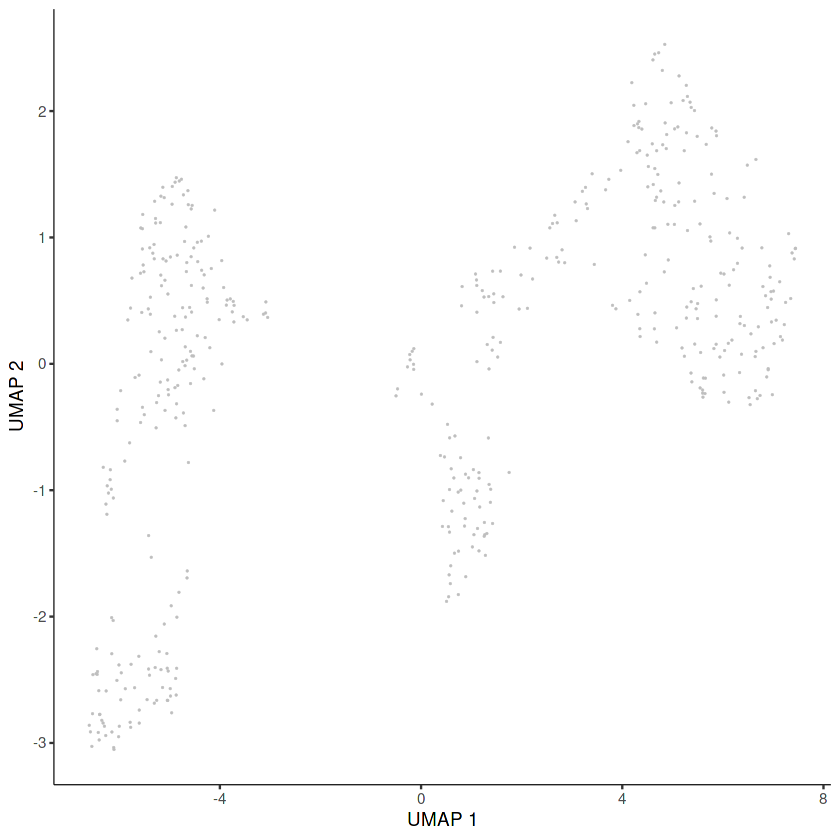

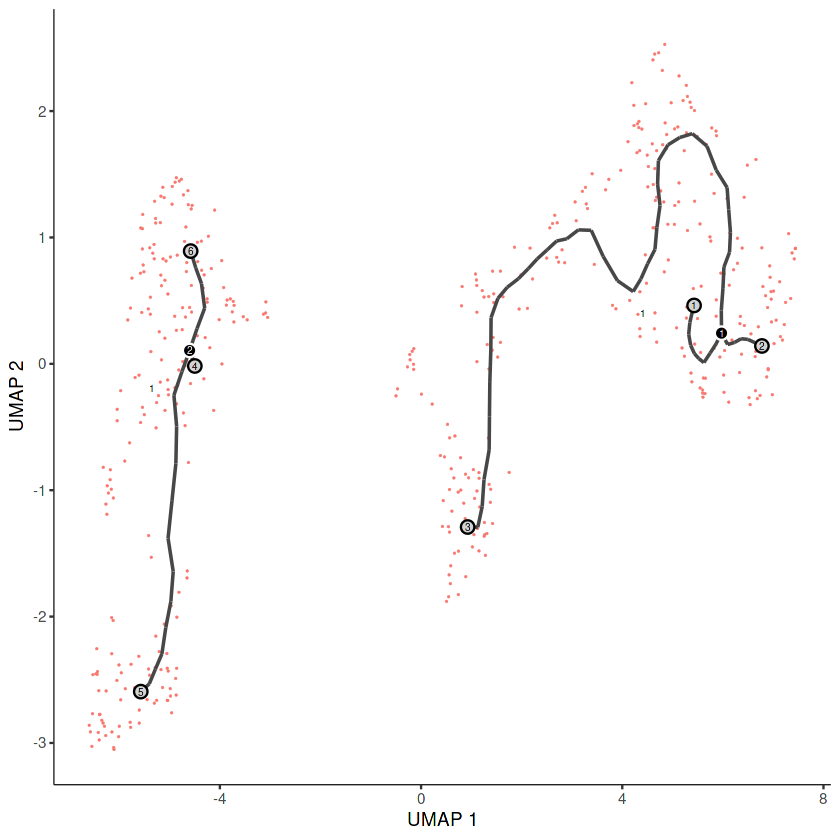

In [5]:
cds = cluster_cells(monocle.object, resolution=1e-2)


monocle.object = preprocess_cds(monocle.object, num_dim = 100, norm_method = "size_only", pseudo_count = 0)
monocle.object = reduce_dimension(monocle.object)
plot_cells(monocle.object)
monocle.object <- learn_graph(cds)
monocle.object <- cluster_cells(monocle.object)
plot_cells(monocle.object, color_cells_by = "partition")



No preprocess_method specified, using preprocess_method = 'PCA'



  |======================================================================| 100%


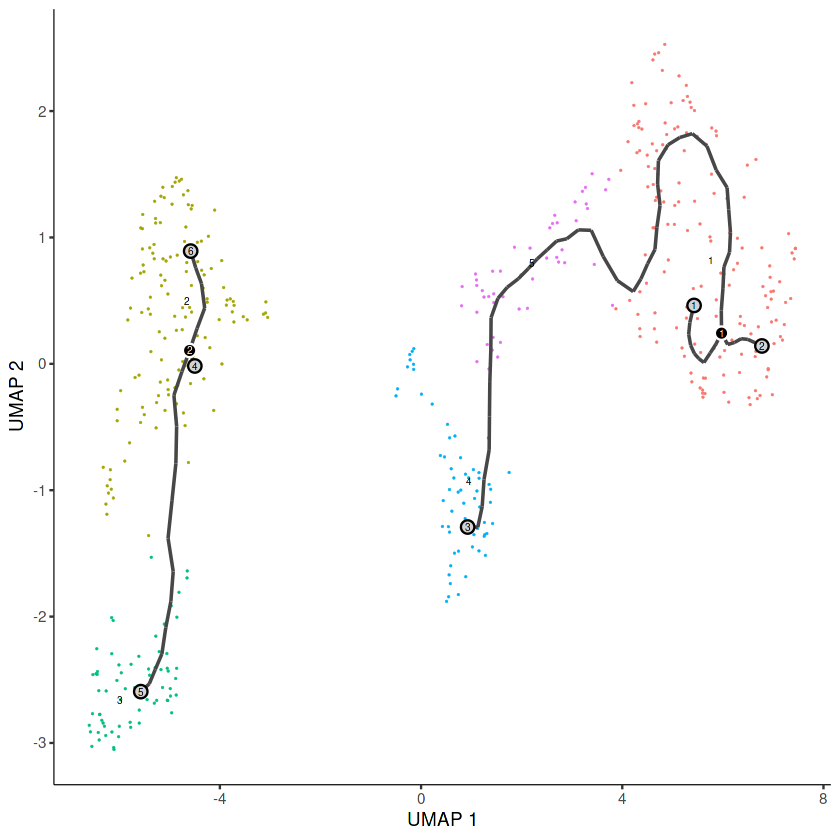

In [6]:
cds = cluster_cells(monocle.object, resolution=1e-2)
plot_cells(cds)
monocle.object <- reduce_dimension(cds, reduction_method = 'UMAP')
monocle.object <- cluster_cells(monocle.object, reduction_method = 'UMAP')
monocle.object <- learn_graph(monocle.object)


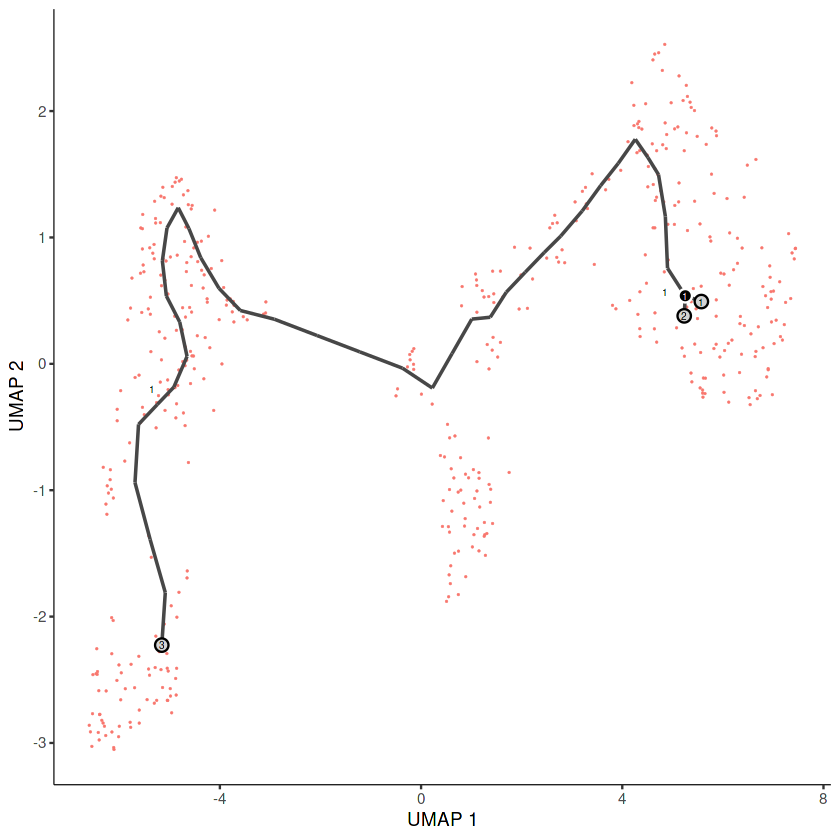

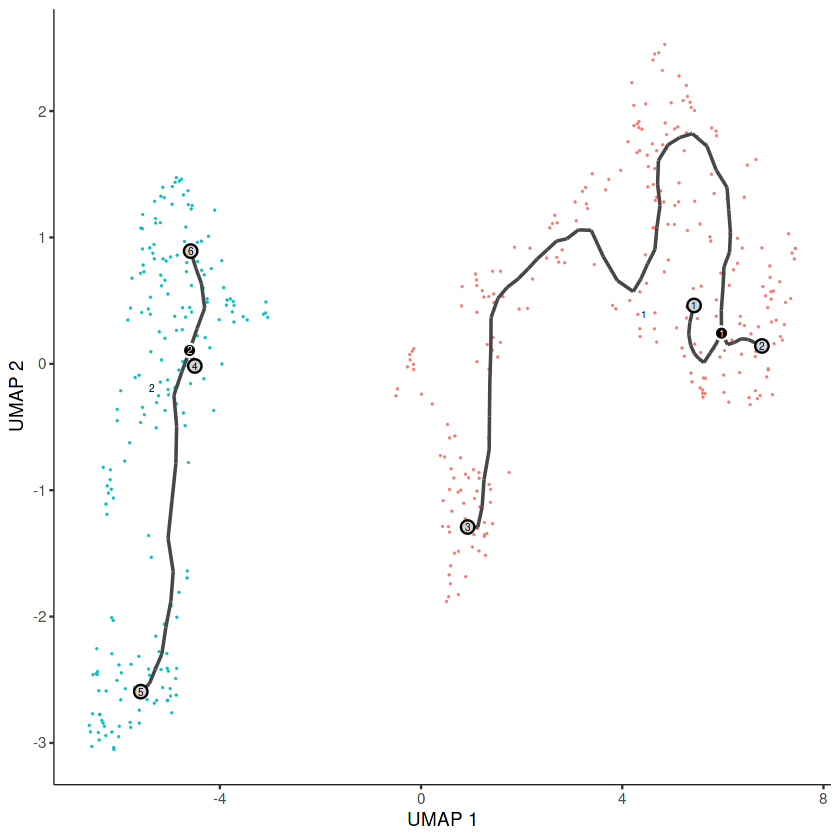

In [7]:

plot_cells(
  cds = monocle.object,
  color_cells_by = "partition",
  show_trajectory_graph = TRUE
)

cds <- cluster_cells(cds, num_clusters = 15)

my_cluster_dim_5 <- pData(cds)$Cluster
plot_cells(cds)



In [8]:
marker_test_res <- top_markers(cds, group_cells_by="cluster", 
                               reference_cells=50, cores=8)
write.csv(marker_test_res, file = "/media/orsalia/Orsalia_SSD_512GB/mm10ribo/PNAS/RNAsingle/clusterallmarkersMonocoleRIS.csv")
top_specific_markers <- marker_test_res %>%
                            filter(fraction_expressing >= 0.10) %>%
                            group_by(cell_group) %>%
                            top_n(6, pseudo_R2)


  |=======================================================| 100%, Elapsed 00:04
  |=======================================================| 100%, Elapsed 00:02


Warning message in if (axis_order == "marker_group") {:
“the condition has length > 1 and only the first element will be used”


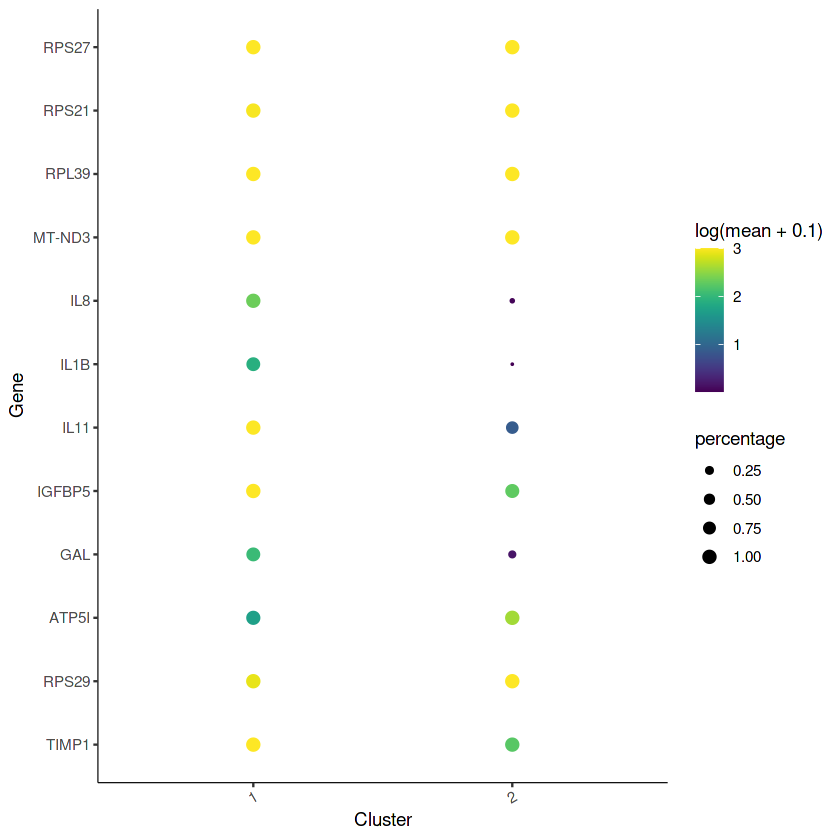

In [9]:
top_specific_marker_ids <- unique(top_specific_markers %>% pull(gene_id))

plot_genes_by_group(cds,
                    top_specific_marker_ids,
                    group_cells_by="cluster",
                    ordering_type="maximal_on_diag",
                    max.size=3)


  |======================================================================| 100%


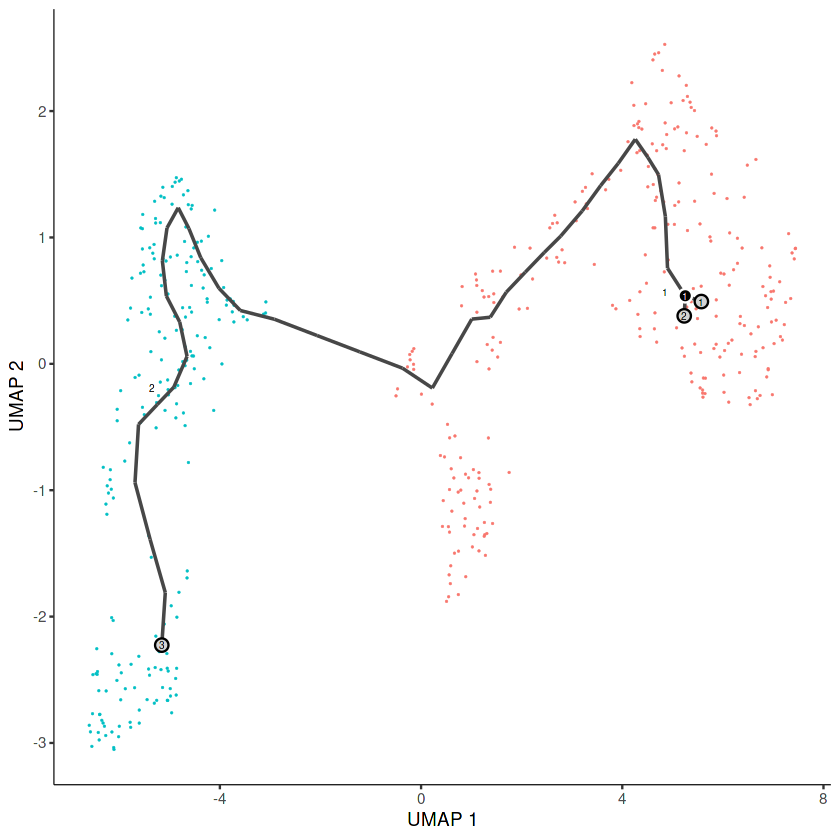

Warning message in if (axis_order == "marker_group") {:
“the condition has length > 1 and only the first element will be used”


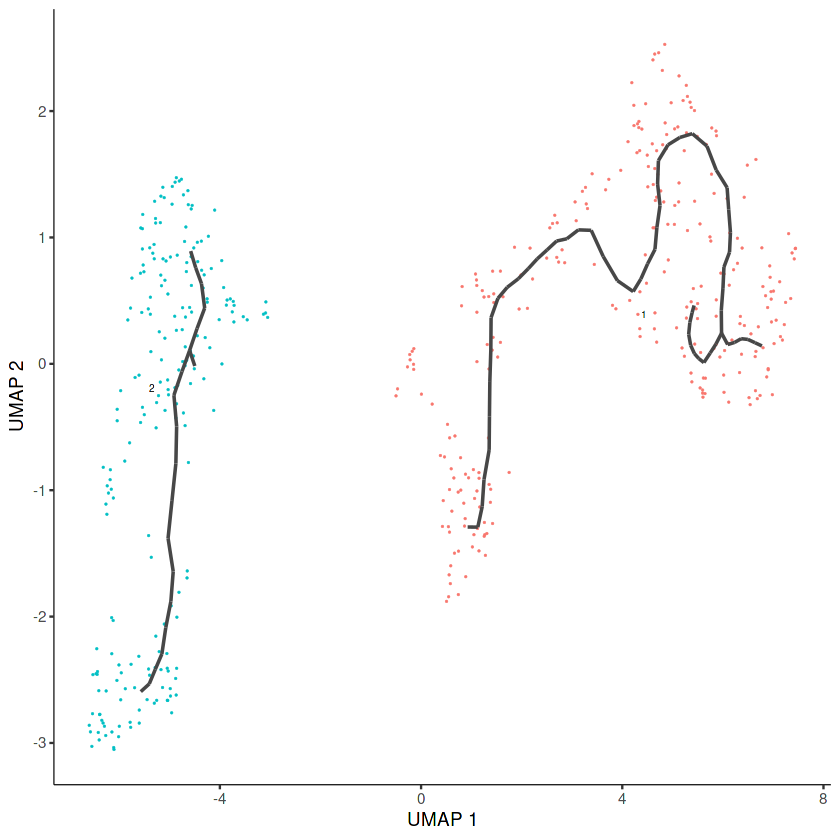

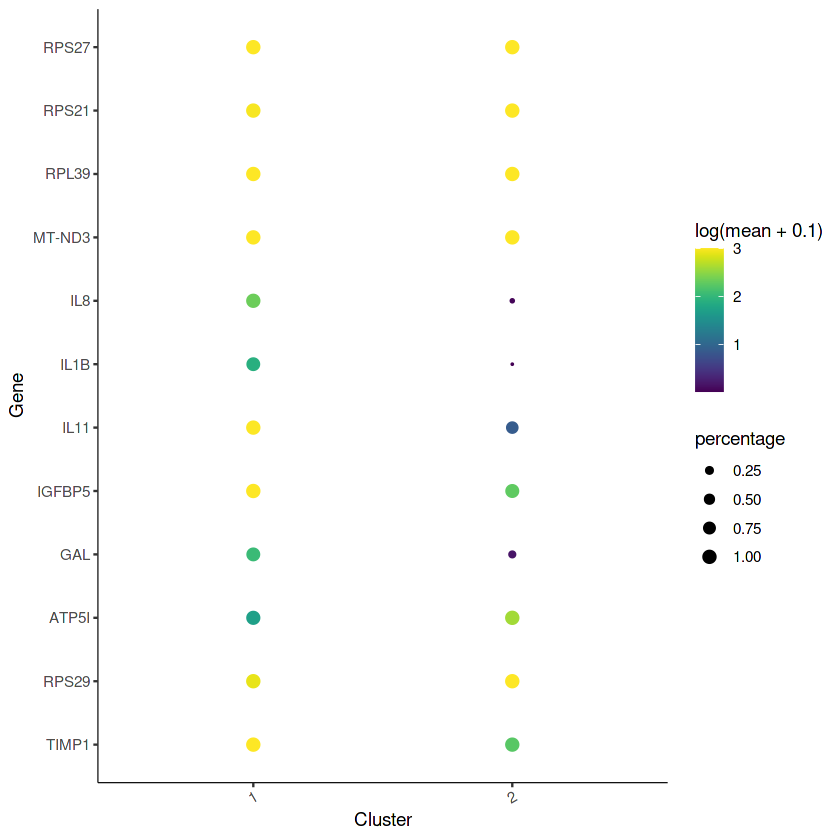

In [10]:

monocle.object <- learn_graph(cds)

plot_cells(
  cds = monocle.object,
  color_cells_by = "cluster",
  show_trajectory_graph = TRUE
)

plot_cells(cds,
           color_cells_by = "cluster",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

plot_genes_by_group(cds,
                    top_specific_marker_ids,
                    group_cells_by="cluster",
                    ordering_type="maximal_on_diag",
                    max.size=3)
                    


In [11]:
marker_test_res <- top_markers(cds, group_cells_by="cluster", 
                               reference_cells=50, cores=8)
write.csv(marker_test_res, file = "/media/orsalia/Orsalia_SSD_512GB/mm10ribo/PNAS/RNAsingle/clusterallmarkersMonocoleRIS4.csv")


  |=======================================================| 100%, Elapsed 00:03
  |=======================================================| 100%, Elapsed 00:02


In [12]:
           
ciliated_cds_pr_test_res <- graph_test(cds, neighbor_graph="knn", cores=4)
pr_deg_ids <- row.names(subset(ciliated_cds_pr_test_res, q_value < 0.05))

head(ciliated_cds_pr_test_res)


#write.csv(ciliated_cds_pr_test_res, file = "/media/orsalia/Orsalia_SSD_512GB/Heart_project/disease/clusterall_heartdiseasemarkersMonocoleLA.csv")           
 
gene_module_df <- find_gene_modules(cds[pr_deg_ids,], resolution=1e-2)

#write.csv(gene_module_df, file = "/media/orsalia/Orsalia_SSD_512GB/Heart_project/disease/clusterall_heartdiseasemarkersMonocole2LA.csv")



  |=======================================================| 100%, Elapsed 04:21


,status,p_value,morans_test_statistic,morans_I,gene_short_name,q_value
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
WASH7P,OK,7.125821e-01,-0.560943767,-0.008537994,WASH7P,0.7943389990
RP11-34P13.10,OK,3.073839e-01,0.503279380,0.003401937,RP11-34P13.10,0.4456315221
AP006222.2,OK,5.033240e-01,-0.008332182,-0.002182172,AP006222.2,0.6473662743
RP4-669L17.10,OK,7.687794e-01,-0.734832883,-0.010210709,RP4-669L17.10,0.8213466016
MTND1P23,OK,6.357703e-01,-0.347175632,-0.006218214,MTND1P23,0.7586399960
MTND2P28,OK,8.048555e-05,3.773503279,0.042517476,MTND2P28,0.0002764788


In [13]:
write.csv(gene_module_df, file = "/media/orsalia/Orsalia_SSD_512GB/mm10ribo/PNAS/RNAsingle/clusterallmarkersMonocoleRIS3.csv")

In [14]:
write.csv(marker_test_res, file = "/media/orsalia/Orsalia_SSD_512GB/mm10ribo/PNAS/RNAsingle/clusterallmarkersMonocoleRIS4.csv")


No preprocess_method specified, using preprocess_method = 'PCA'



  |======================================================================| 100%


Cells aren't colored in a way that allows them to be grouped.



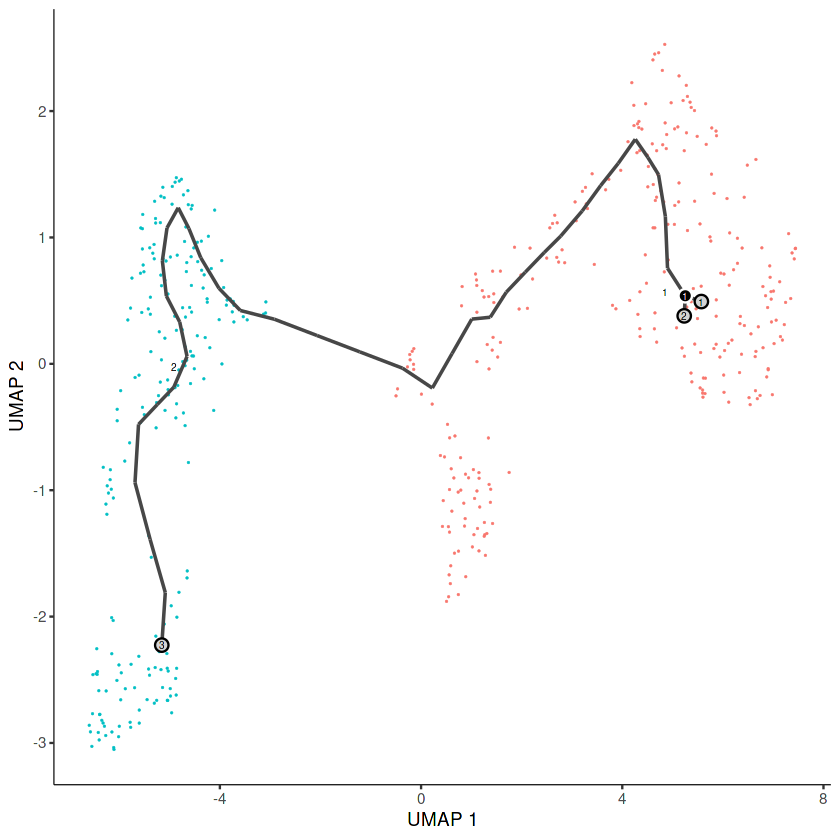

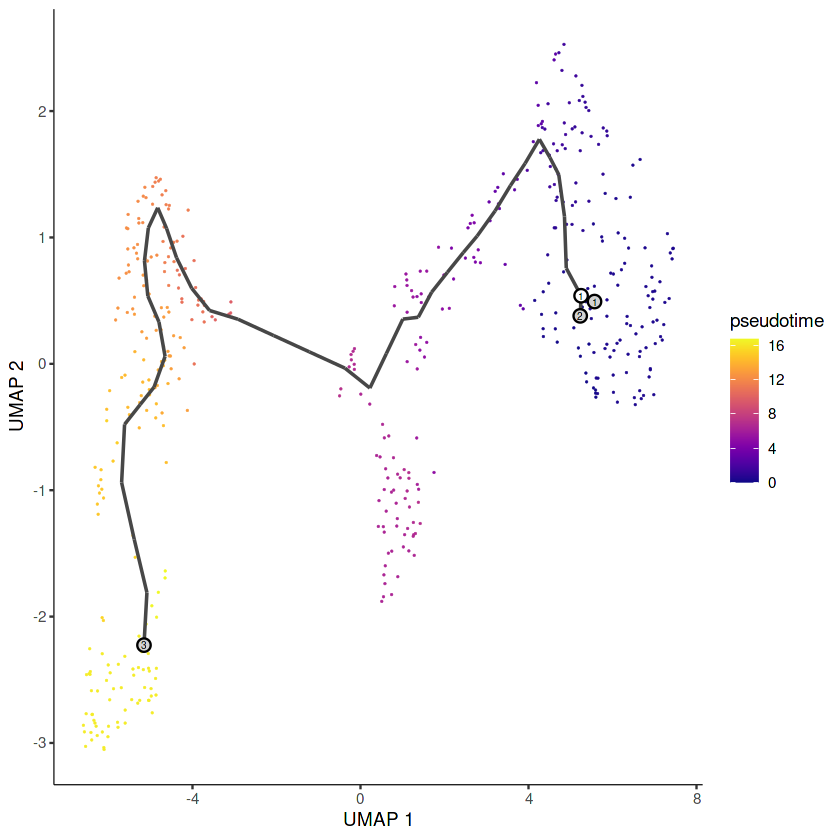

In [15]:
cds_subset = reduce_dimension(cds, max_components = 2)
cds_subset = cluster_cells(cds_subset)
cds_subset = learn_graph(cds_subset)
plot_cells(cds_subset, 
           color_cells_by = "cluster")
           
cds_subset = order_cells(cds_subset,root_pr_nodes = "Y_1")
plot_cells(cds_subset, 
           color_cells_by = "pseudotime")
                              

Cells aren't colored in a way that allows them to be grouped.



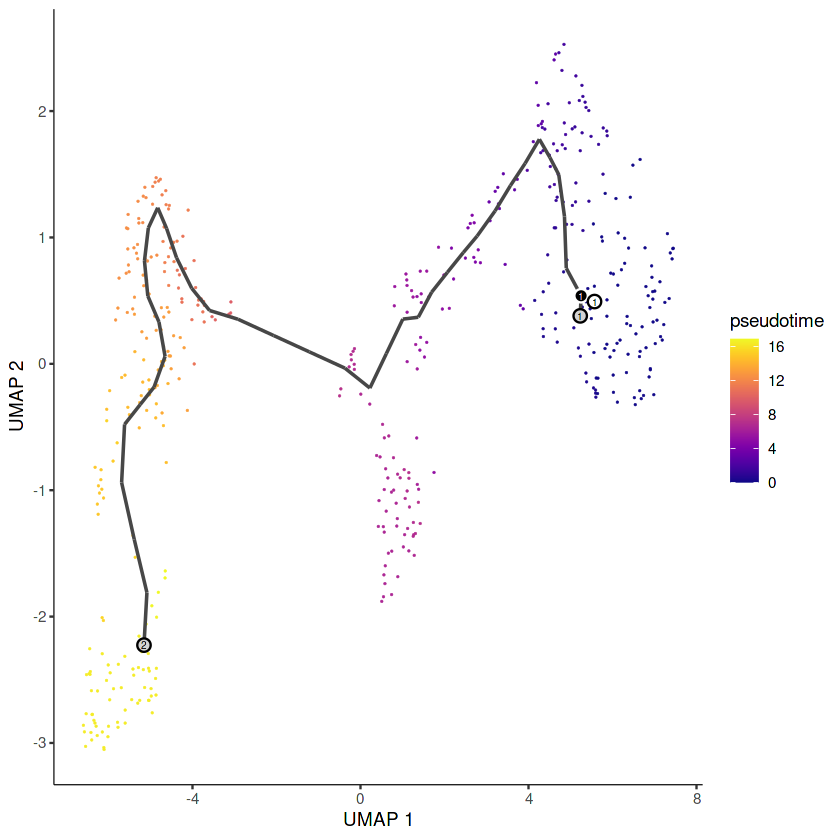

In [31]:
cds_subset = order_cells(cds_subset,root_pr_nodes = "Y_3")
plot_cells(cds_subset, 
           color_cells_by = "pseudotime")
                              

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


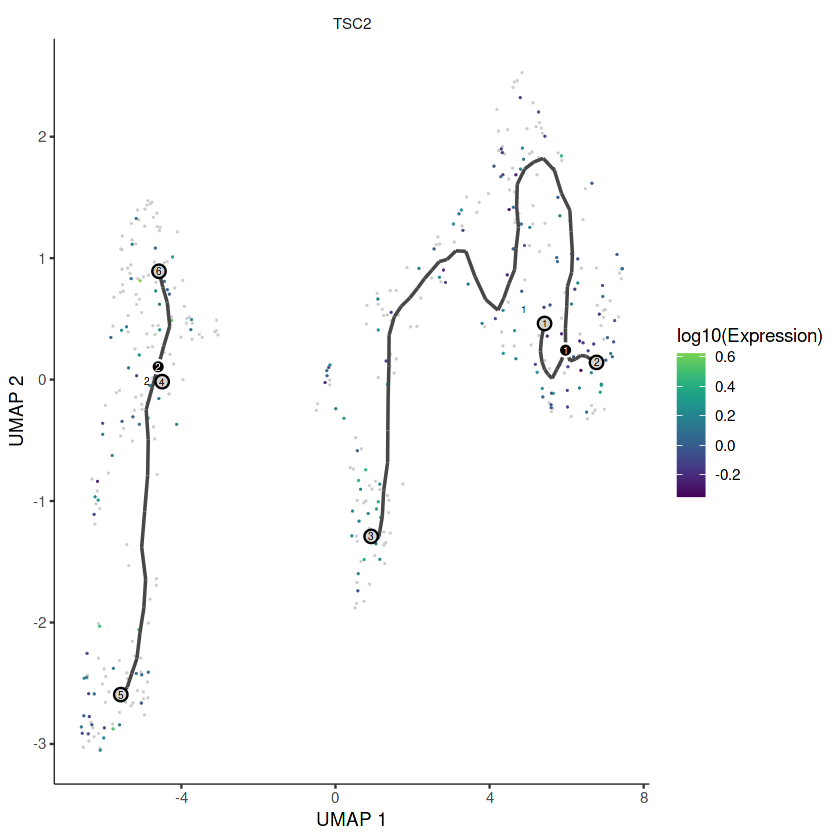

In [17]:

ciliated_genes <- c("TSC2"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


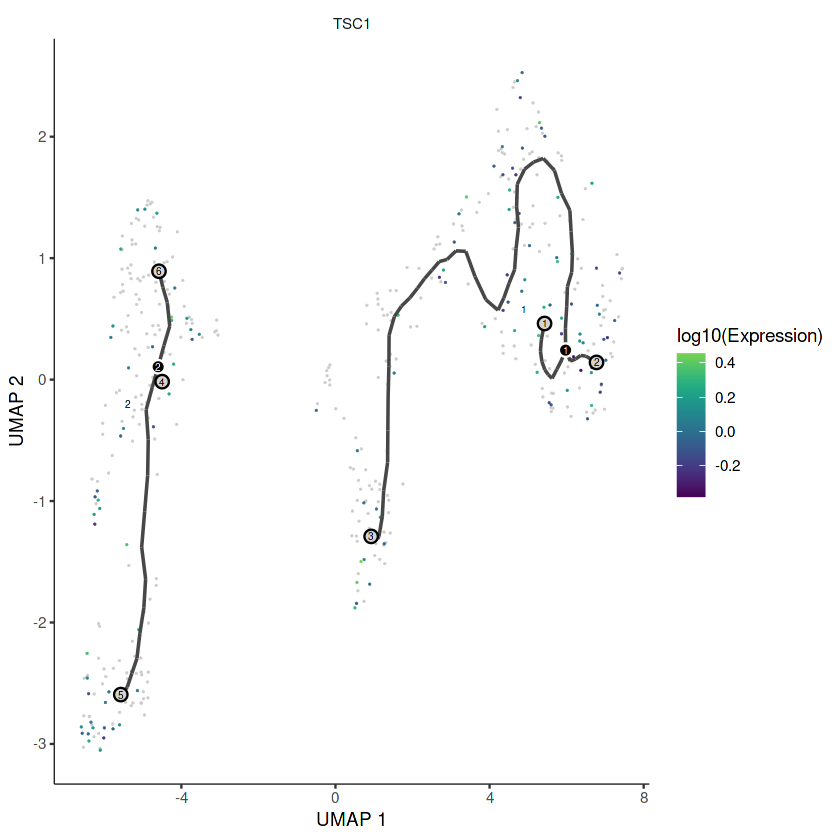

In [18]:
ciliated_genes <- c("TSC1"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


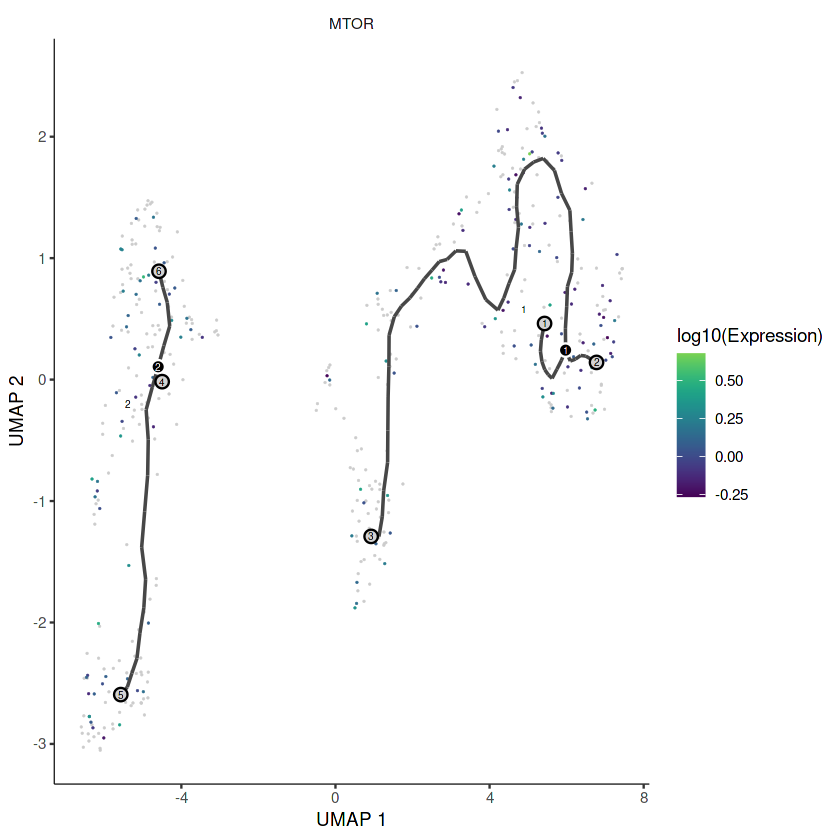

In [19]:
ciliated_genes <- c("MTOR"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


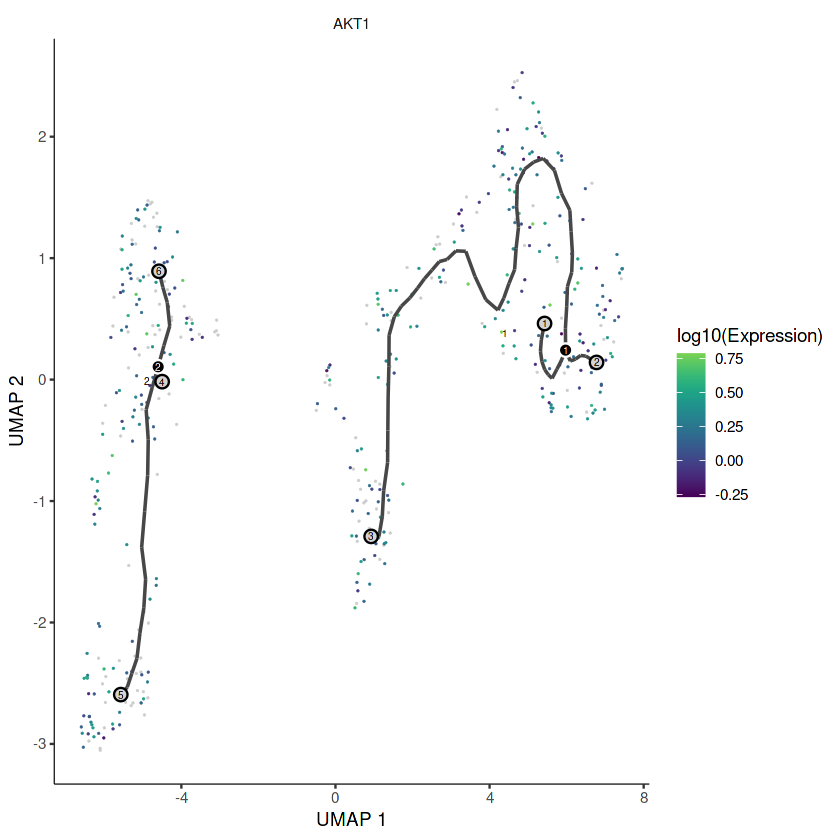

In [20]:
ciliated_genes <- c("AKT1"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


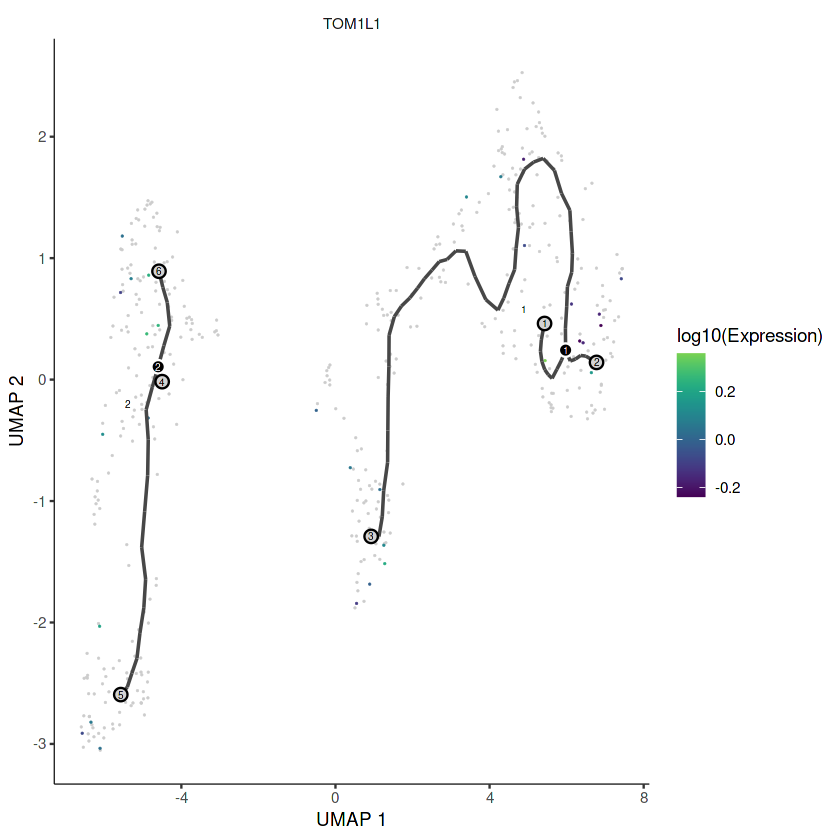

In [21]:
ciliated_genes <- c("TOM1L1"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


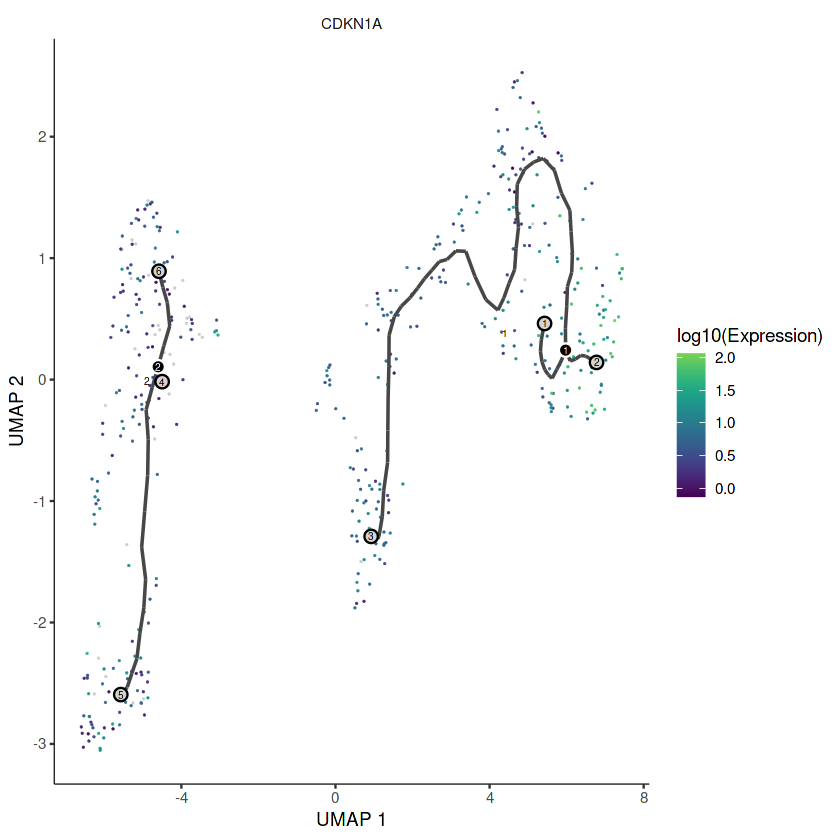

In [22]:
ciliated_genes <- c("CDKN1A"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


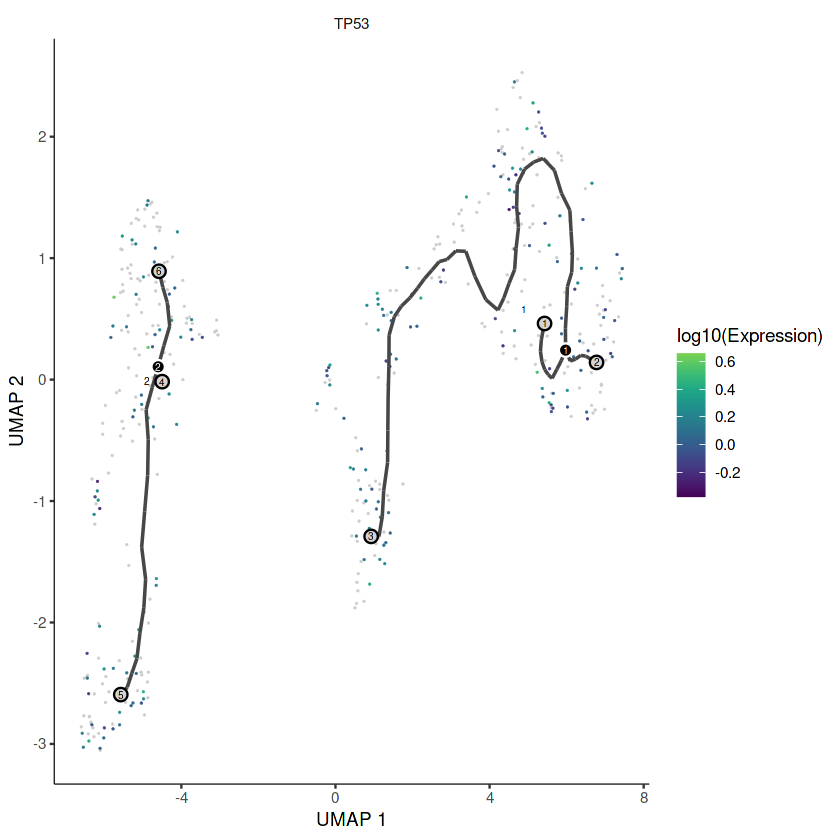

In [23]:
ciliated_genes <- c("TP53"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


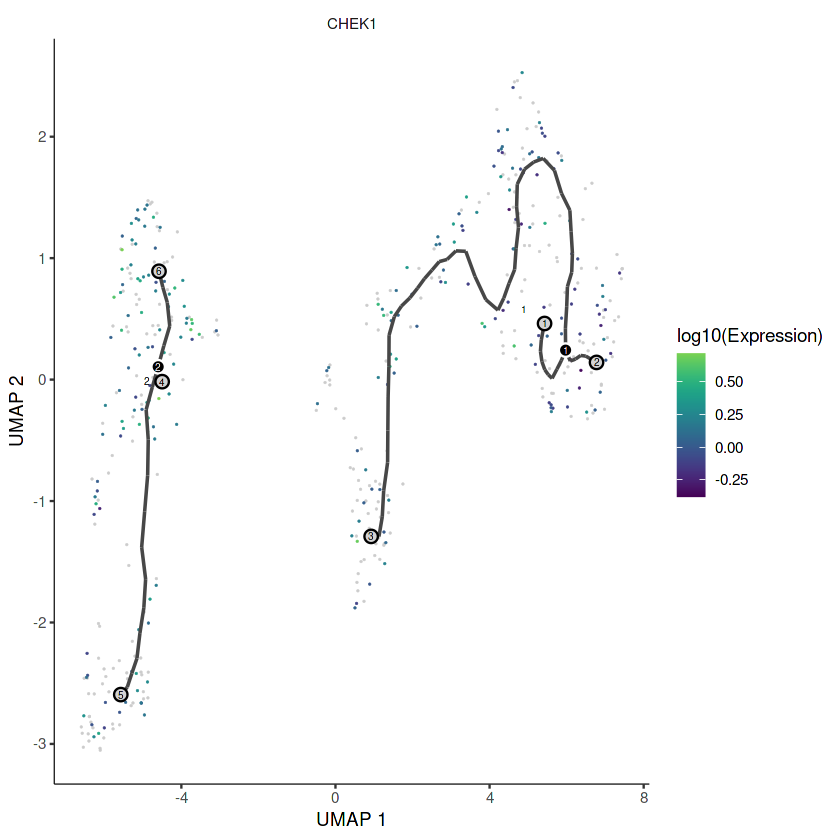

In [24]:
ciliated_genes <- c("CHEK1"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


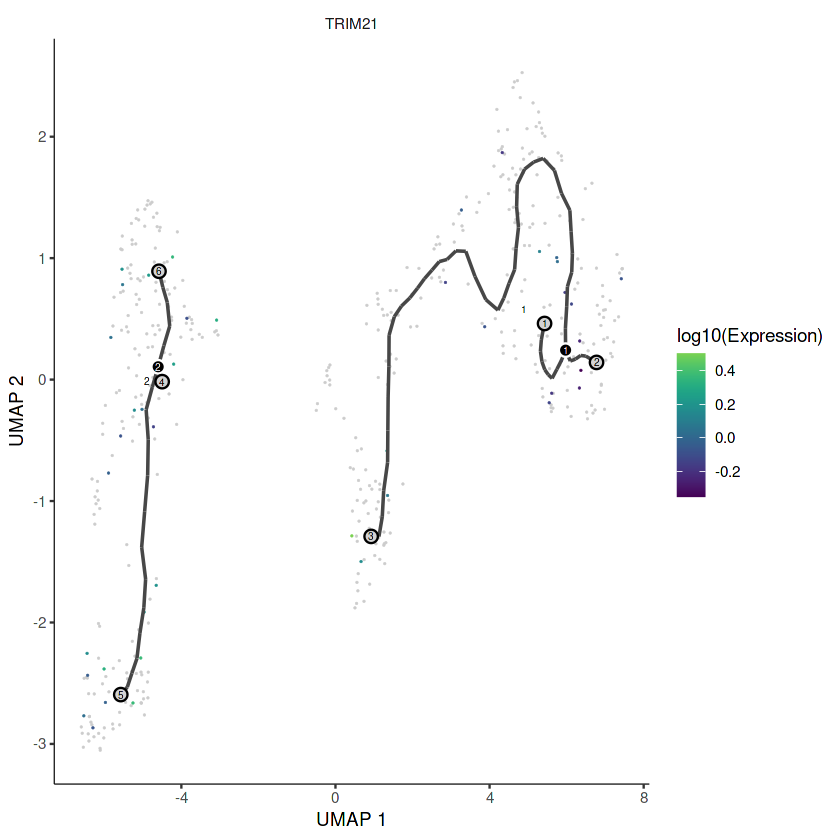

In [25]:
ciliated_genes <- c("TRIM21"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


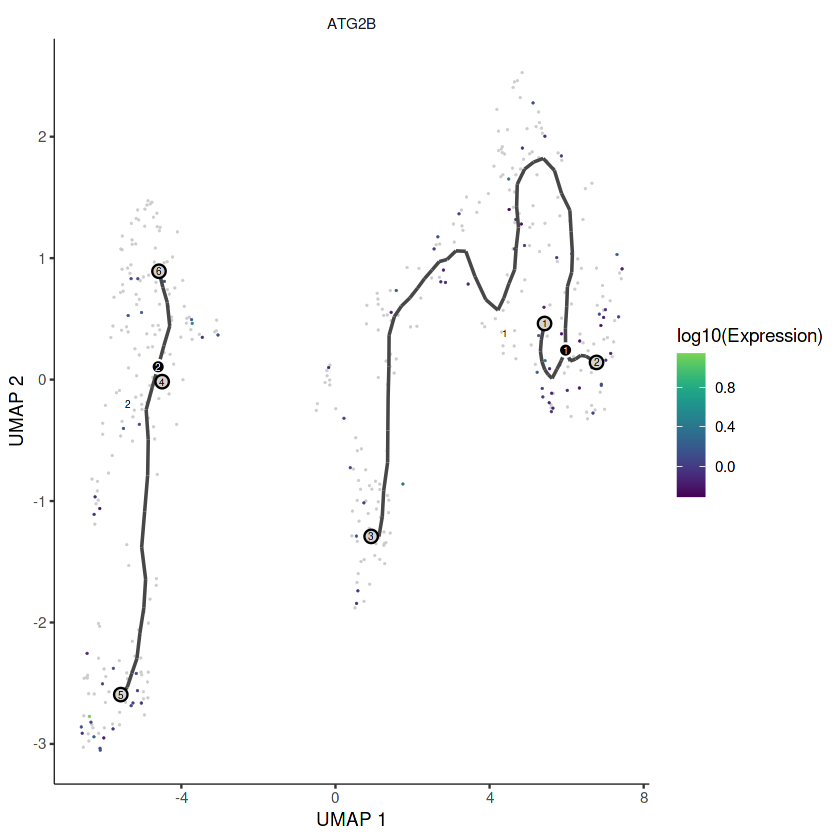

In [26]:
ciliated_genes <- c("ATG2B"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


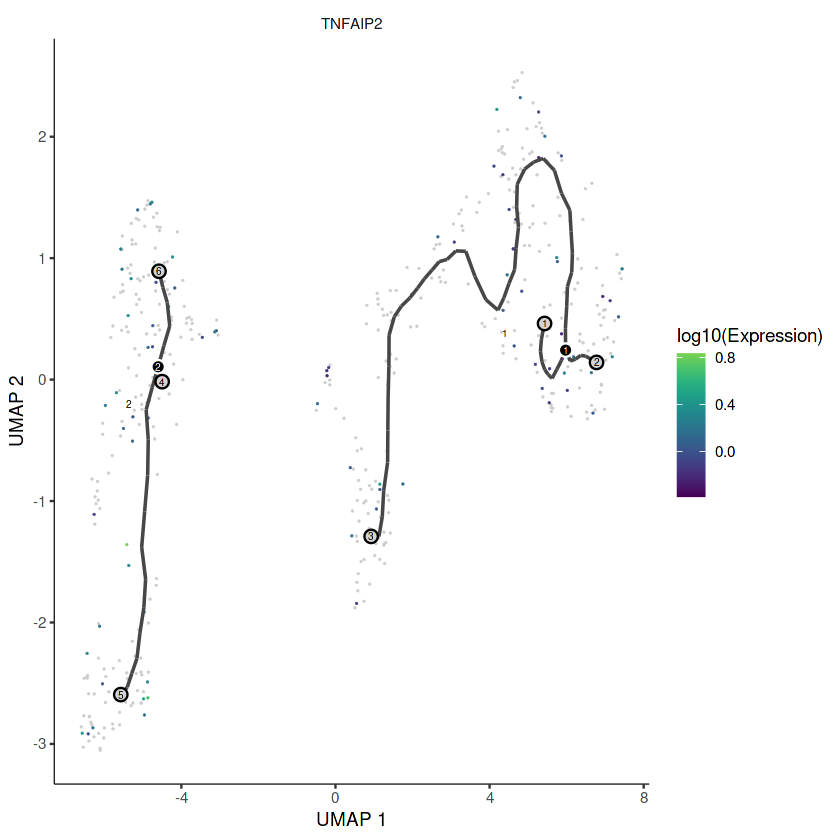

In [27]:
ciliated_genes <- c("TNFAIP2"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


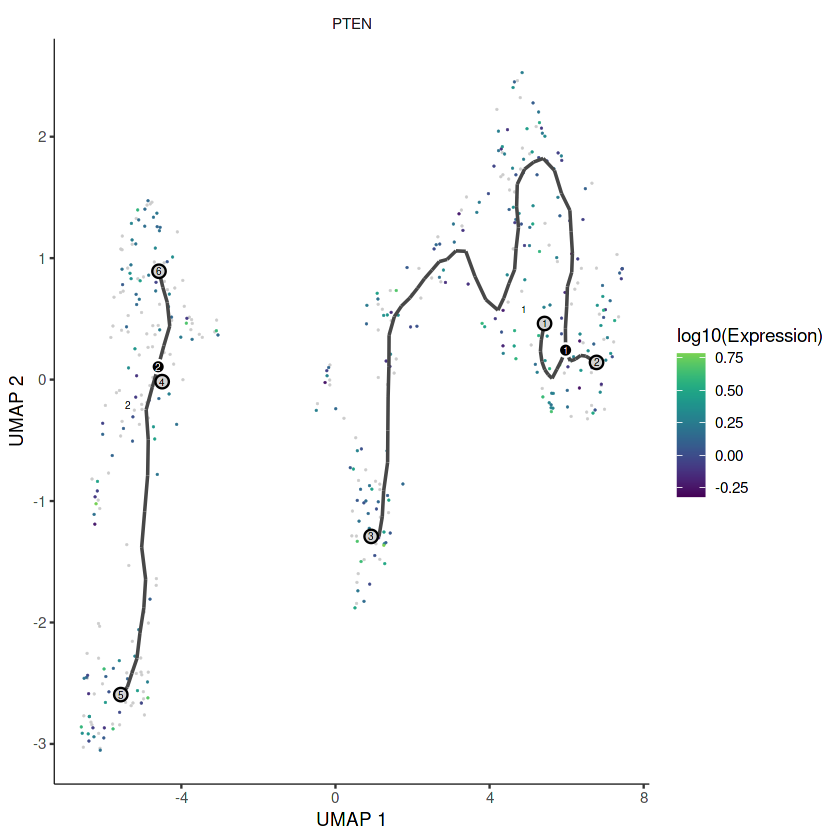

In [28]:
ciliated_genes <- c("PTEN"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


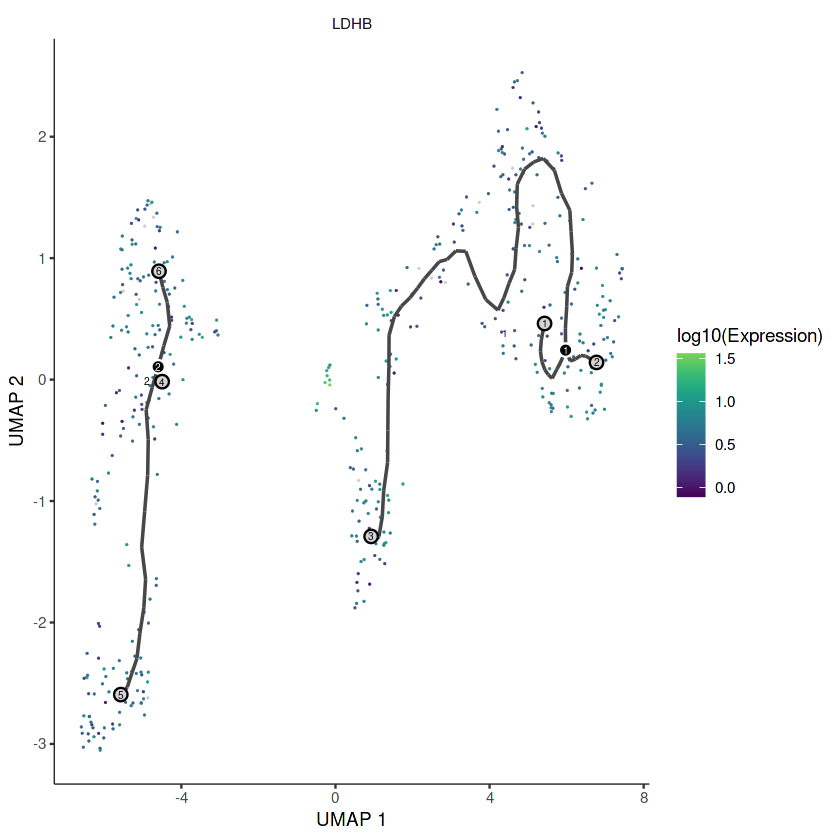

In [29]:
ciliated_genes <- c("LDHB"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


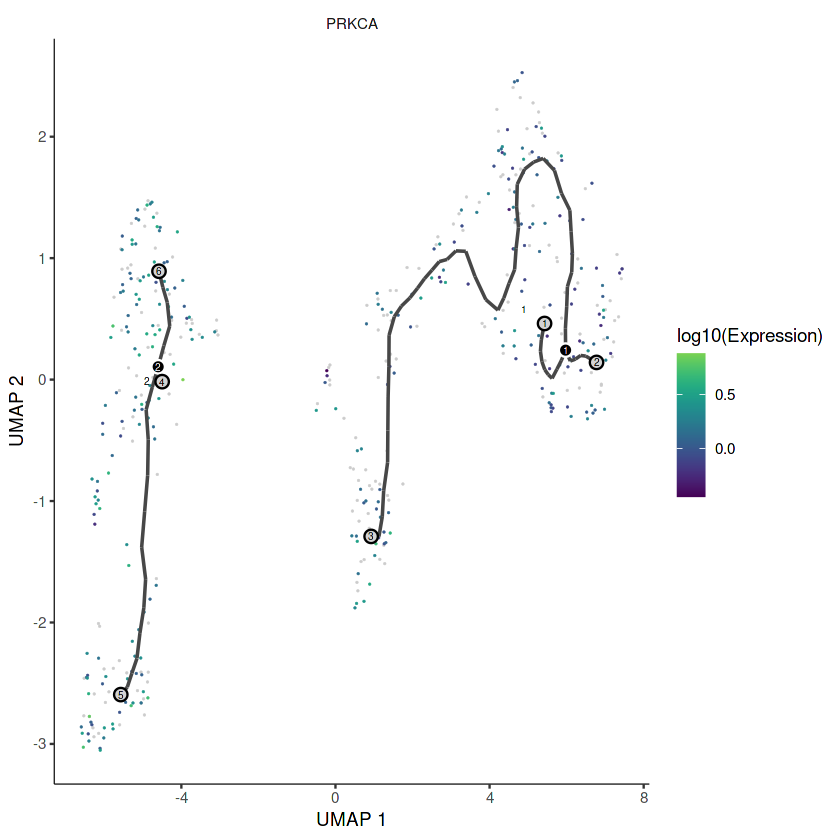

In [30]:
ciliated_genes <- c("PRKCA"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


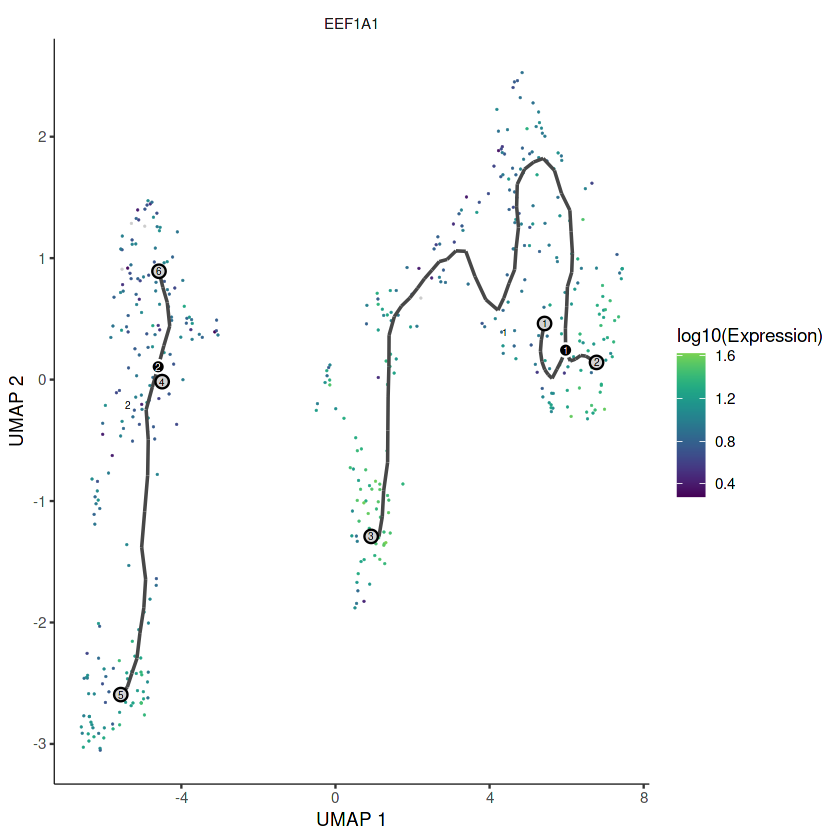

In [32]:
ciliated_genes <- c("EEF1A1"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


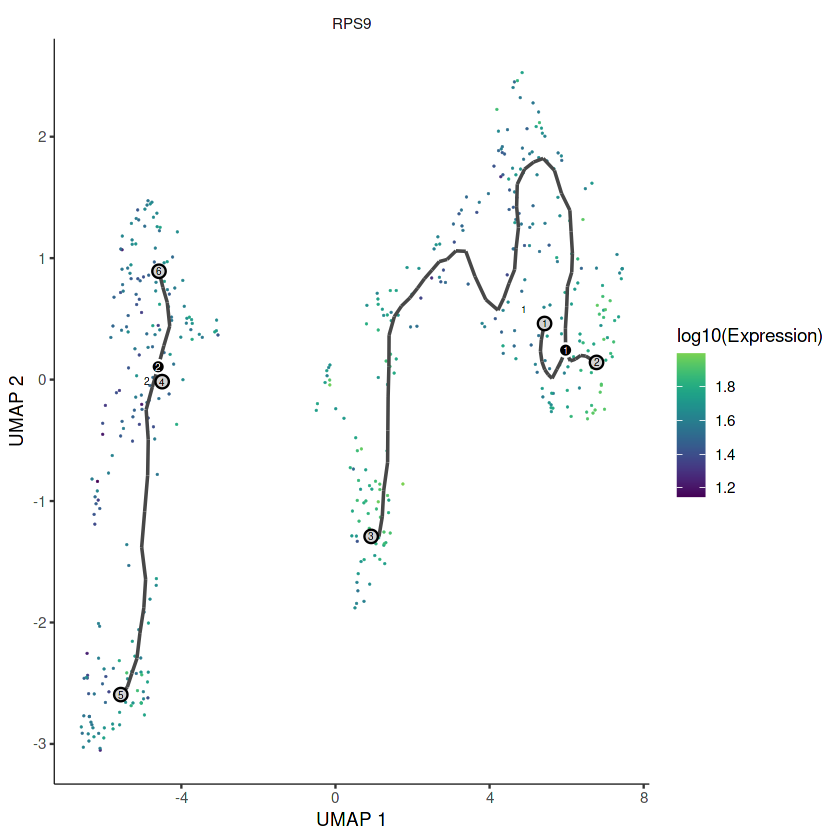

In [35]:
ciliated_genes <- c("RPS9"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

In [33]:
"TSC2","TSC1","MTOR","TRIM21","TPM4","TOM1L1","ATP5PF","ATP5F1B","ATG2B","TNFAIP2","AKT1"


ciliated_genes <- c("ENO1",
                    "NXF1",
                    "HSPA8",
                    "HSP90AA1"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected ','
1: "TSC2",
          ^


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


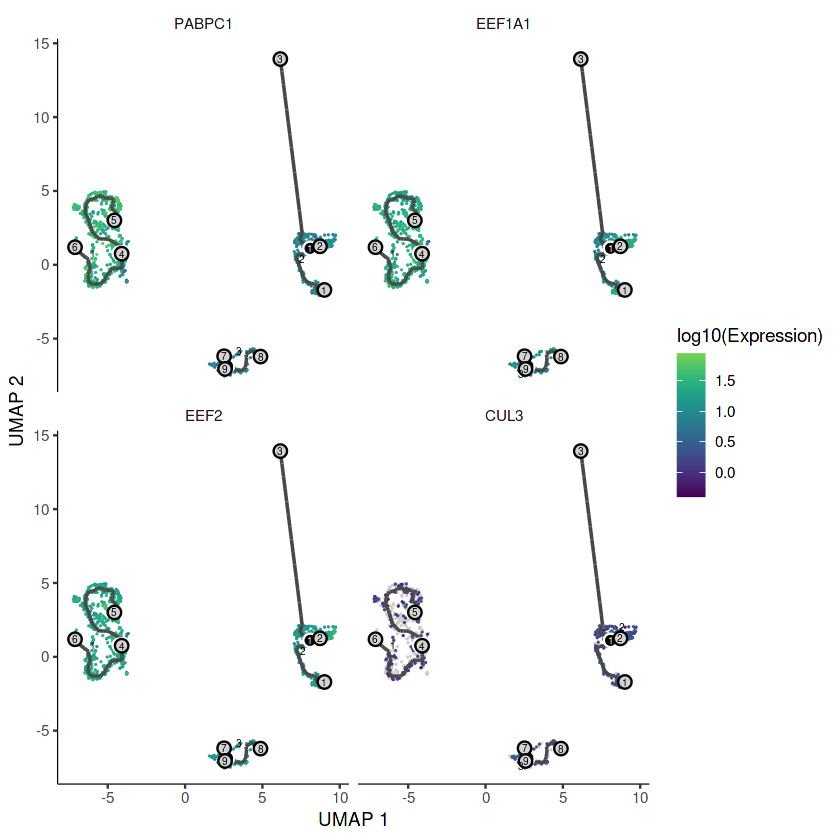

In [34]:
ciliated_genes <- c("PABPC1",
                    "EEF1A1",
                    "EEF2",
                    "CUL3"
)

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=TRUE,
           show_trajectory_graph=TRUE)